Columns: ['step', 'type', 'amount', 'nameorig', 'oldbalanceorg', 'newbalanceorig', 'namedest', 'oldbalancedest', 'newbalancedest', 'isfraud', 'isflaggedfraud']
Data loaded correctly.


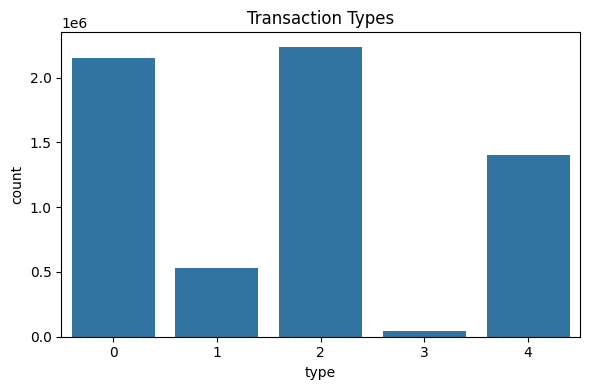

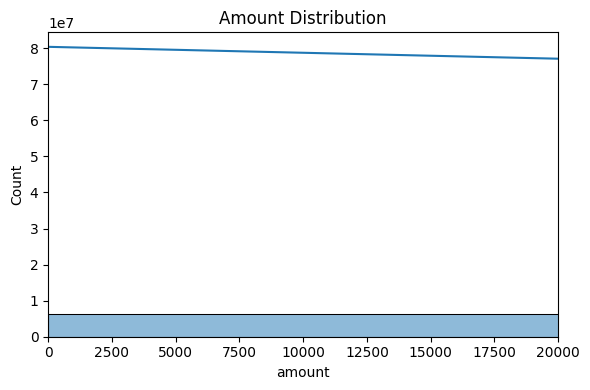

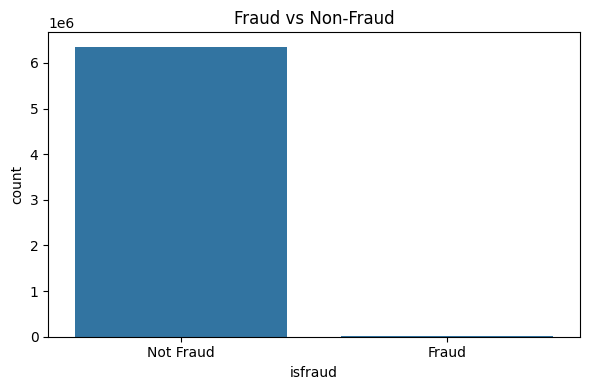

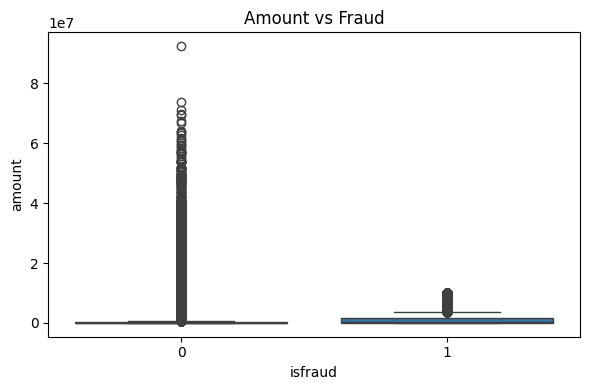

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.80      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



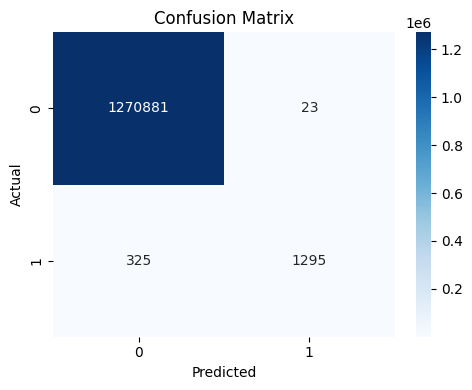

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('AIML Dataset.csv')
df.columns = df.columns.str.strip().str.lower().str.replace('#', '').str.replace(' ', '').str.replace('.', '')
print("Columns:", df.columns.tolist()) 

# Cleaning
if 'step' in df.columns and 'isfraud' in df.columns:
    print("Data loaded correctly.")

df.drop(columns=['nameorig', 'namedest', 'isflaggedfraud'], inplace=True, errors='ignore')

if 'type' in df.columns:
    df['type'] = pd.factorize(df['type'])[0]

df = df.dropna(subset=['isfraud'])
df.fillna(0, inplace=True)

# EDA
if 'type' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='type', data=df)
    plt.title('Transaction Types')
    plt.tight_layout()
    plt.show()

if 'amount' in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df['amount'], bins=40, kde=True)
    plt.title('Amount Distribution')
    plt.xlim(0, 20000)
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='isfraud', data=df)
plt.title('Fraud vs Non-Fraud')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

if 'amount' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='isfraud', y='amount', data=df)
    plt.title('Amount vs Fraud')
    plt.tight_layout()
    plt.show()

X = df.drop(columns='isfraud')
y = df['isfraud']

# 80 20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# traning my model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate of my model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
